[...]

## Imports

In [23]:
#| echo: false

import sys
from pathlib import Path

src_path = Path('..')
sys.path.append(str(src_path.resolve()))

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from great_tables import GT
from pandas.plotting import scatter_matrix

from src.stylesheet import customize_plots
from src.inspection import make_df, display, display2

In [25]:
#| include: false
customize_plots()
%config InlineBackend.figure_format = 'svg'

## The dataset

### Load the data

We begin by exploring the data to get to know the features and patterns on which we will base our analysis.

In [26]:
#| output: false
#| warning: false
#| code-fold: true

if 'data' not in locals():
    data = pd.read_csv(
        "../data/raw/PBJ_Daily_Nurse_Staffing_Q1_2024.zip",
        encoding='ISO-8859-1',
        low_memory=False
    )
else:
    print("data loaded.")

data loaded.


### Inspect the data

In [27]:
GT(data.sample(10))

PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,Hrs_RNDON_emp,Hrs_RNDON_ctr,Hrs_RNadmin,Hrs_RNadmin_emp,Hrs_RNadmin_ctr,Hrs_RN,Hrs_RN_emp,Hrs_RN_ctr,Hrs_LPNadmin,Hrs_LPNadmin_emp,Hrs_LPNadmin_ctr,Hrs_LPN,Hrs_LPN_emp,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
215262,RESORTS AT CHESTER RIVER MANOR CORP,CHESTERTOWN,MD,Kent,29,2024Q1,20240119,91,8.0,8.0,0.0,8.0,8.0,0.0,23.5,23.5,0.0,0.0,0.0,0.0,72.75,65.0,7.75,242.75,178.5,64.25,0.0,0.0,0.0,0.0,0.0,0.0
445419,OVERTON COUNTY HEALTH AND REHAB CENTER,LIVINGSTON,TN,Overton,133,2024Q1,20240216,76,8.0,8.0,0.0,8.25,8.25,0.0,17.0,17.0,0.0,10.75,10.75,0.0,81.0,81.0,0.0,195.25,195.25,0.0,9.25,9.25,0.0,0.0,0.0,0.0
676154,GRACE HILL NURSING CENTER,HUGHES SPRINGS,TX,Cass,67,2024Q1,20240221,43,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.34,6.34,0.0,28.41,28.41,0.0,65.27,65.27,0.0,0.0,0.0,0.0,15.64,15.64,0.0
185470,THE WILLOWS AT HAMBURG,LEXINGTON,KY,Fayette,67,2024Q1,20240301,58,0.0,0.0,0.0,21.0,21.0,0.0,13.5,13.5,0.0,0.0,0.0,0.0,102.16,102.16,0.0,131.84,131.84,0.0,0.0,0.0,0.0,40.16,40.16,0.0
395434,MT LEBANON REHABILITATION AND WELLNESS CENTER,PITTSBURGH,PA,Allegheny,3,2024Q1,20240328,81,0.0,0.0,0.0,0.0,0.0,0.0,30.17,10.25,19.92,11.3,11.3,0.0,87.41,35.4,52.01,161.36,44.55,116.81,0.0,0.0,0.0,0.0,0.0,0.0
105057,PINES NURSING HOME,MIAMI,FL,Miami-Dade,86,2024Q1,20240308,43,8.0,8.0,0.0,0.0,0.0,0.0,25.5,25.5,0.0,0.0,0.0,0.0,53.5,53.5,0.0,95.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
265482,RIVER CITY LIVING COMMUNITY,JEFFERSON CITY,MO,Cole,51,2024Q1,20240229,51,0.0,0.0,0.0,0.0,0.0,0.0,15.15,6.4,8.75,7.8,7.8,0.0,19.0,19.0,0.0,92.25,61.4,30.85,16.4,16.4,0.0,30.9,23.4,7.5
155796,CEDARS THE,LEO,IN,Allen,3,2024Q1,20240107,37,0.0,0.0,0.0,2.0,0.0,2.0,7.0,7.0,0.0,0.0,0.0,0.0,12.0,12.0,0.0,45.25,45.25,0.0,0.0,0.0,0.0,16.0,16.0,0.0
455903,LAKE LODGE NURSING & REHABILITATION,LAKE WORTH,TX,Tarrant,439,2024Q1,20240221,66,8.0,8.0,0.0,0.0,0.0,0.0,31.0,31.0,0.0,23.76,23.76,0.0,74.74,74.74,0.0,145.48,145.48,0.0,0.0,0.0,0.0,6.77,6.77,0.0
675960,CASTLE PINES HEALTH AND REHABILITATION,LUFKIN,TX,Angelina,5,2024Q1,20240122,101,8.0,8.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,25.2,25.2,0.0,71.05,71.05,0.0,152.88,152.88,0.0,0.0,0.0,0.0,44.21,44.21,0.0


In [28]:
#| include: false
#| code-fold: true
data.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330966 entries, 0 to 1330965
Data columns (total 33 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   PROVNUM           1330966 non-null  object 
 1   PROVNAME          1330966 non-null  object 
 2   CITY              1330966 non-null  object 
 3   STATE             1330966 non-null  object 
 4   COUNTY_NAME       1330966 non-null  object 
 5   COUNTY_FIPS       1330966 non-null  int64  
 6   CY_Qtr            1330966 non-null  object 
 7   WorkDate          1330966 non-null  int64  
 8   MDScensus         1330966 non-null  int64  
 9   Hrs_RNDON         1330966 non-null  float64
 10  Hrs_RNDON_emp     1330966 non-null  float64
 11  Hrs_RNDON_ctr     1330966 non-null  float64
 12  Hrs_RNadmin       1330966 non-null  float64
 13  Hrs_RNadmin_emp   1330966 non-null  float64
 14  Hrs_RNadmin_ctr   1330966 non-null  float64
 15  Hrs_RN            1330966 non-null  float64
 16  

In [29]:
#| include: true

df = data.describe().round(1)
GT(df.reset_index())

index,COUNTY_FIPS,WorkDate,MDScensus,Hrs_RNDON,Hrs_RNDON_emp,Hrs_RNDON_ctr,Hrs_RNadmin,Hrs_RNadmin_emp,Hrs_RNadmin_ctr,Hrs_RN,Hrs_RN_emp,Hrs_RN_ctr,Hrs_LPNadmin,Hrs_LPNadmin_emp,Hrs_LPNadmin_ctr,Hrs_LPN,Hrs_LPN_emp,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
count,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0,1330966.0
mean,91.1,20240215.7,83.4,5.2,5.1,0.1,10.3,10.0,0.2,34.4,31.5,3.0,6.6,6.6,0.1,66.3,59.8,6.5,171.2,158.2,13.0,4.2,4.2,0.1,8.5,8.3,0.2
std,99.2,83.0,49.1,4.5,4.5,0.9,14.9,14.6,1.8,34.7,31.4,10.7,10.7,10.6,1.3,48.4,44.8,16.2,113.7,106.3,32.6,13.1,12.7,2.1,17.6,17.2,2.2
min,1.0,20240101.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,31.0,20240123.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,12.0,0.0,0.0,0.0,0.0,32.8,28.2,0.0,97.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,69.0,20240215.0,76.0,8.0,8.0,0.0,7.5,7.4,0.0,25.6,24.2,0.0,0.0,0.0,0.0,56.9,50.8,0.0,148.1,136.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,117.0,20240309.0,104.0,8.0,8.0,0.0,16.0,16.0,0.0,44.8,41.5,0.0,9.0,8.8,0.0,88.6,81.2,5.8,217.0,203.1,11.0,0.0,0.0,0.0,11.2,10.8,0.0
max,840.0,20240331.0,743.0,327.8,327.8,42.0,266.2,266.2,92.5,908.6,904.2,430.6,246.8,246.8,154.4,614.6,604.0,454.0,1857.7,1573.1,694.3,452.0,279.0,280.5,395.6,395.6,128.9


### Group the features

We note that there are 91 records per provider (`len(data["WorkDate"].unique())`) and 1,330,966 records in the table overall. The following table, which collapses the raw data across providers, thus has 14,626 $\left( \frac{1330966}{91} \right)$ entries.

In [30]:
#| include: true
#| label: tbl-counts
#| tbl-cap: Record counts across state, country, city, and provider.

df = data.loc[:, [
    "STATE",
    "COUNTY_NAME", "COUNTY_FIPS",
    "CITY",
    "PROVNAME", "PROVNUM",
]].value_counts()
GT(df.reset_index().head(n=20))

STATE,COUNTY_NAME,COUNTY_FIPS,CITY,PROVNAME,PROVNUM,count
AK,Anchorage,20,ANCHORAGE,PRESTIGE CARE & REHAB CENTER OF ANCHORAGE,025025,91
OH,Allen,3,LIMA,LIMA CONVALESCENT HOME,366297,91
OH,Allen,3,LIMA,SHAWNEE MANOR,365361,91
OH,Allen,3,LIMA,SPRINGS OF LIMA THE,366464,91
OH,Allen,3,LIMA,SPRINGVIEW MANOR,366221,91
OH,Allen,3,SPENCERVILLE,ROSELAWN MANOR,365744,91
OH,Ashland,5,ASHLAND,BRETHREN CARE VILLAGE HEALTH CARE CENTER,366166,91
OH,Ashland,5,ASHLAND,CRYSTAL CARE CENTER OF ASHLAND,366239,91
OH,Ashland,5,ASHLAND,GOOD SHEPHERD THE,365093,91
OH,Ashland,5,ASHLAND,KINGSTON OF ASHLAND,365646,91


In [31]:
#| include: false

display2(
    "data['STATE'].value_counts()",
    "data['COUNTY_NAME'].value_counts()",
    "data['CITY'].value_counts()",
    "data['PROVNAME'].value_counts()",
    "data['MDScensus'].value_counts()",
    width="340px",
    globs=globals()
)

In [32]:
#| tbl-column: margin
    
GT(data[["CY_Qtr", "WorkDate", "MDScensus"]].head())

CY_Qtr,WorkDate,MDScensus
2024Q1,20240101,50
2024Q1,20240102,49
2024Q1,20240103,49
2024Q1,20240104,50
2024Q1,20240105,51


### Clean the data

## Explore the dataset

### Visualize distributions

### Visualize relationships

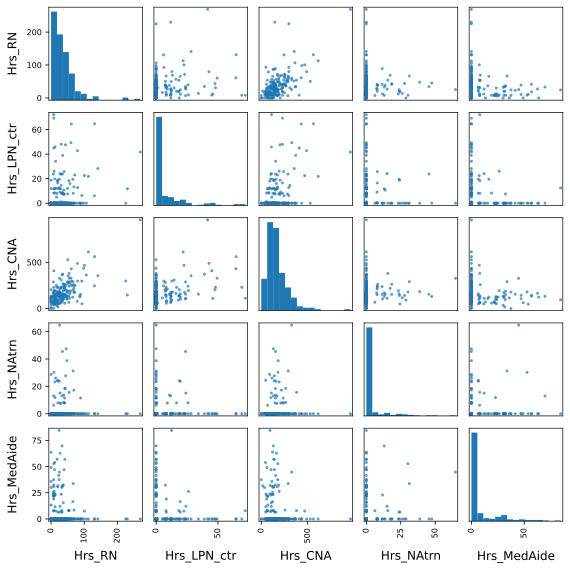

In [33]:
#| include: true
#| label: fig-scatter-matrix
#| fig-cap: Scatter matrix of nursing worker working hours
#| column: body-outset-right

attributes = ["Hrs_RN", "Hrs_LPN_ctr", "Hrs_CNA", "Hrs_NAtrn", "Hrs_MedAide"]
n = len(attributes)

fig, axs = plt.subplots(n, n, figsize=(8, 8))
scatter_matrix(
    data[attributes].sample(200),
    ax=axs, alpha=.7,
    hist_kwds=dict(bins=15, linewidth=0)
)
fig.align_ylabels(axs[:, 0])
fig.align_xlabels(axs[-1, :])
for ax in axs.flatten():
    ax.tick_params(axis='both', which='both', length=3.5)

# save_fig("scatter_matrix_plot")

plt.show()

### Compare groups

::: {#nte-rec1 .callout-note appearance="regular"}

## [Recommendation].


:::

## Feature engineer

### Join geographical data

### Join seasonal data

## Analyze geography

## Analyze seasonality

## Model

## Extra visualizations

### Sparklines

In [34]:
#| include: false
#| code-summary: Group by state, pivot on date and sum hours

df = data.copy()

hours_columns = [
    'Hrs_RNDON', 'Hrs_RNadmin', 'Hrs_LPNadmin',
    'Hrs_CNA', 'Hrs_NAtrn', 'Hrs_MedAide'
]

# Sum hours across positions
df['Total_Hours'] = df[hours_columns].sum(axis=1)

# Create a list of total hours per state over the work dates
city_hours = (
    df.groupby(['STATE', 'WorkDate'])['Total_Hours']
    .sum()
    .reset_index()
)

# Pivot to create lists of total hours for each state
pivoted_city_hours = city_hours.pivot_table(
    index=['STATE'],
    columns='WorkDate',
    values='Total_Hours',
    aggfunc='sum',
    fill_value=0
)

# Create a new column with lists of total hours over the 91 days
pivoted_city_hours['lines'] = pivoted_city_hours.apply(
    lambda row: {'val': row.tolist()}, axis=1
)

# Prepare the DataFrame for gt
gt_df = pivoted_city_hours.reset_index()[['STATE', 'lines']]

# Create a line plot for total hours trajectory by state
# gt_df['bars'] = gt_df['lines']

gt_df.head()


WorkDate,STATE,lines
0,AK,"{'val': [2207.94, 2712.93, 2761.5499999999997,..."
1,AL,"{'val': [48104.89, 58689.2, 61364.25, 61429.5,..."
2,AR,"{'val': [42257.44, 51400.62, 53068.8, 53019.07..."
3,AZ,"{'val': [25315.55, 29657.54, 30869.61, 31035.9..."
4,CA,"{'val': [240612.74, 272889.84, 278436.09, 2814..."


In [35]:
#| label: fig-sparklines
#| fig-cap: Sparklines of average work hours across 91 days by state.
#| code-fold: true

# Plot sparklines of average work hours across 91 days by state
(
    GT(gt_df.head(), rowname_col="STATE")
    .fmt_nanoplot(
        columns="lines",
        reference_line="mean",
        reference_area=["min", "q1"]
    )
    .tab_header(
        title="Nurse hours worked in the United States",
        subtitle="The top 5 busiest states",
    )
    .tab_stubhead(label="State")
    .cols_label(
        lines="Total hours worked over 91 days",
    )
)

GT(_tbl_data=WorkDate STATE                                              lines
0           AK  {'val': [2207.94, 2712.93, 2761.5499999999997,...
1           AL  {'val': [48104.89, 58689.2, 61364.25, 61429.5,...
2           AR  {'val': [42257.44, 51400.62, 53068.8, 53019.07...
3           AZ  {'val': [25315.55, 29657.54, 30869.61, 31035.9...
4           CA  {'val': [240612.74, 272889.84, 278436.09, 2814..., _body=<great_tables._gt_data.Body object at 0x162cd8a50>, _boxhead=Boxhead([ColInfo(var='STATE', type=<ColInfoTypeEnum.stub: 2>, column_label='STATE', column_align='left', column_width=None), ColInfo(var='lines', type=<ColInfoTypeEnum.default: 1>, column_label='Total hours worked over 91 days', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x162e1ba50>, _spanners=Spanners([]), _heading=Heading(title='Nurse hours worked in the United States', subtitle='The top 5 busiest states', preheader=None), _stubhead='State', _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x16d0c6c50>, _formats=[<great_tables._gt_data.FormatInfo object at 0x17d830b50>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), heading_background_color=OptionsInfo(scss=True, category='heading', type='value', value=None), heading_align=OptionsInfo(scss=True, category='heading', type='value', value='center'), heading_title_font_size

## Concluding thoughts

(see @nte-rec1)

<!-- ## Archive -->

In [36]:
#| include: false
import pandas as pd
df = pd.DataFrame({'name': ['arizona', '', 'berlin', 'london']})

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geo_clipboard")

from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
df['location'] = df['name'].apply(geocode)

df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)

In [37]:
#| include: false
df

,name,location,point
0,arizona,"(Arizona, United States, (34.395342, -111.7632...","(34.395342, -111.763275, 0.0)"
1,,None,None
2,berlin,"(Berlin, Deutschland, (52.510885, 13.3989367))","(52.510885, 13.3989367, 0.0)"
3,london,"(London, Greater London, England, United Kingd...","(51.5074456, -0.1277653, 0.0)"
